In [106]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
X,y = fetch_openml('mnist_784', version=1, return_X_y=True)
y = y.astype(int)
X = X/255

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000, random_state=42, shuffle=True)


In [107]:
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator
from scipy.stats import beta

class beta_NaiveBayes(BaseEstimator):
    
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        self.params = [None] * 10

        for c in range(10):
            x_class_n = self.X_train[self.y_train == c]

            means = np.mean(x_class_n, axis=0)
            variances = np.var(x_class_n, axis=0)            
            
            ks = ((means * (1 - means)) / variances) -1
            alphas = ks * means
            betas = ks * (1 - means)

            p_class = len(self.y_train[self.y_train == c]) / len(self.y_train)

            self.params[c] =  {'alphas' : np.array(alphas), 
                            'betas' : np.array(betas),
                            'p_class' : p_class}

    def predict(self, X_test):

        predict = np.array([])

        for index, row in X_test.iterrows():

            p = 0
            _class = None
            row = np.array(row)

            for c in range(10):

                alphas = self.params[c]['alphas']
                betas = self.params[c]['betas']
                p_class = self.params[c]['p_class']
                
                beta_probs = beta.cdf(row+0.1, alphas, betas) - beta.cdf(row-0.1, alphas, betas)
                
                np.nan_to_num(beta_probs, copy=False, nan=1.0)
                p_temp = np.product(beta_probs) * p_class
                

                if p_temp > p:
                    p = p_temp
                    _class = c
            
            predict = np.append(predict, _class)
        
        return predict




In [108]:
#Create a KNN Classifier
clf = beta_NaiveBayes() 

#Train the model using the training sets
clf.fit(X_train, y_train)

In [109]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [110]:
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8398


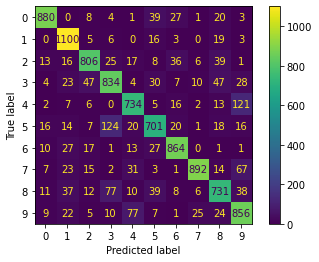

In [111]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=[x for x in range(10)])
display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[x for x in range(10)])
display.plot()